In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'C:\Users\R P SHUKLA\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
data.shape

(1470, 35)

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### CHECKING DATATYPES 

In [9]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### MISSING VALUES

In [10]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### VISUALIZATION

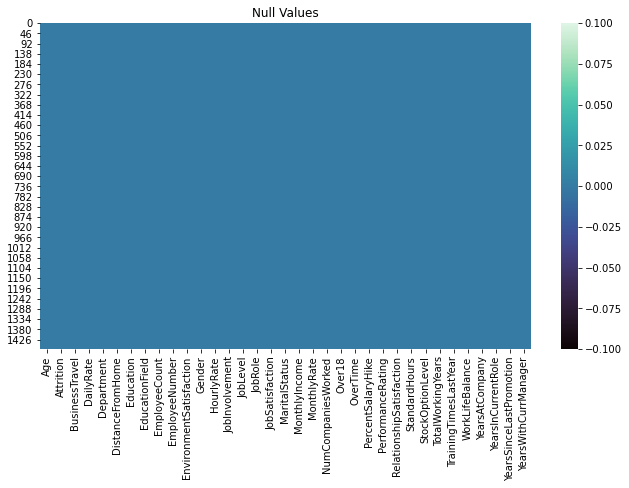

In [12]:
plt.figure(figsize = [11,6])
sns.heatmap(data.isnull(),cmap = 'mako')
plt.title('Null Values')
plt.show()

NO NULL VALUES FOUND

In [13]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Features and Labels

In [14]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

### Univariate Analysis

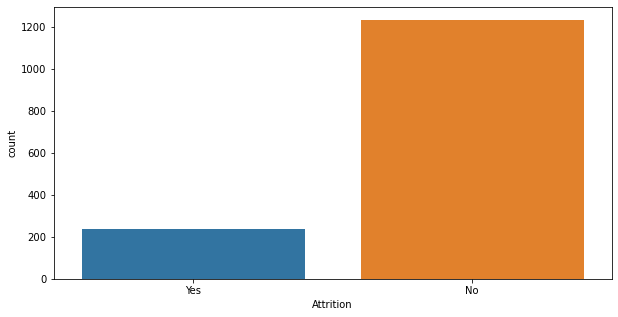

In [16]:
plt.figure(figsize = [10,5])
sns.countplot(x='Attrition',data=data)
plt.show()

1.High Attrition of employees

2.The number of observations belonging to NO Category is very high when compared to the number of observations in Yes Category.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

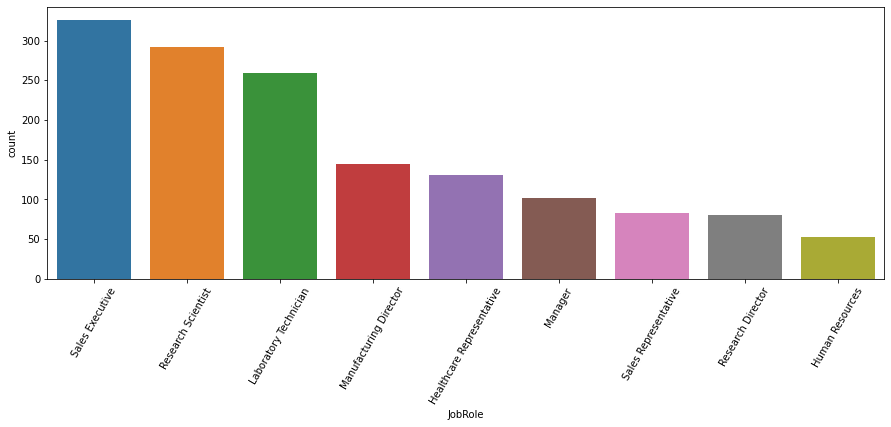

In [17]:
plt.figure(figsize = [15,5])

sns.countplot(x='JobRole',data=data)
plt.xticks(rotation=60)

SALES EXECUTIVE HAVE HIGHEST NUMBER OF EMPLOYEE WHEREAS HUMAN RESOURCE HAVE LEAST 
NUMBER OF EMPLOYEE.

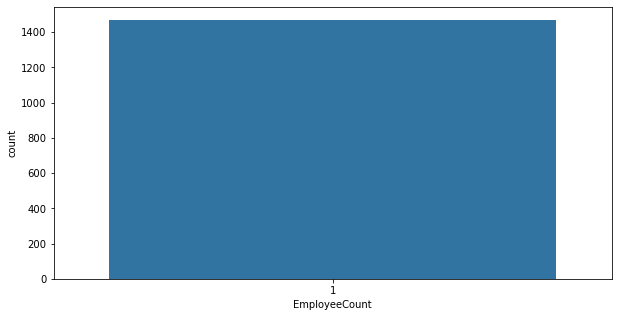

In [19]:
plt.figure(figsize = [10,5])
sns.countplot(x='EmployeeCount',data=data)
plt.show()

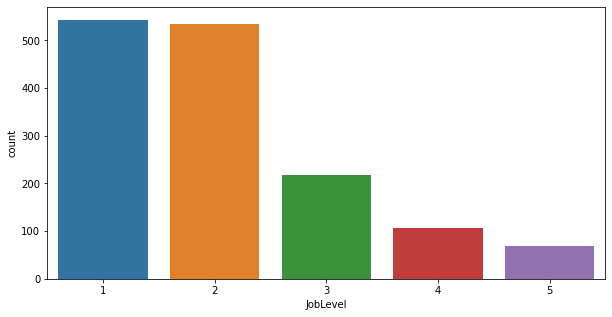

In [20]:
plt.figure(figsize = [10,5])
sns.countplot(x='JobLevel',data=data)
plt.show()

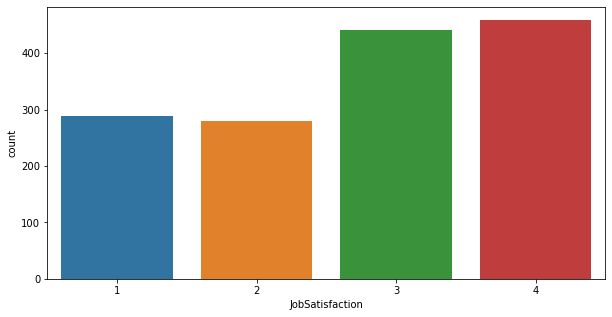

In [21]:
plt.figure(figsize = [10,5])
sns.countplot(x='JobSatisfaction',data=data)
plt.show()

MAXIMUM NUMBER OF EMPLOYEE RATED JOB SATISFACTION AS 4

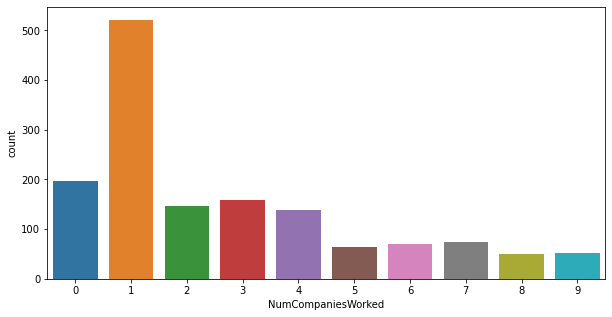

In [22]:
plt.figure(figsize = [10,5])
sns.countplot(x='NumCompaniesWorked',data=data)
plt.show()

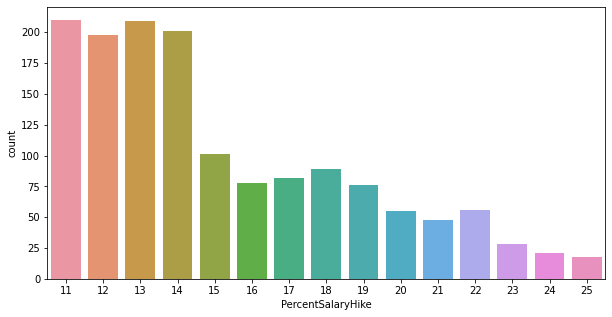

In [23]:
plt.figure(figsize = [10,5])
sns.countplot(x='PercentSalaryHike',data=data)
plt.show()

11% IS THE HIGHEST SALARY HIKE AND 25 IS THE LEAST.

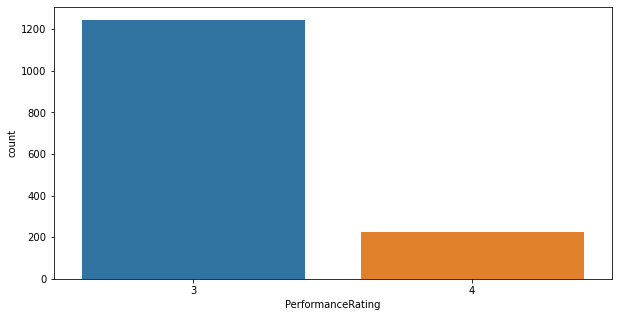

In [24]:
plt.figure(figsize = [10,5])
sns.countplot(x='PerformanceRating',data=data)
plt.show()

MAXIMUM PERFORMANCE RATING GIVEN TO EMPLOYEE IS 4.

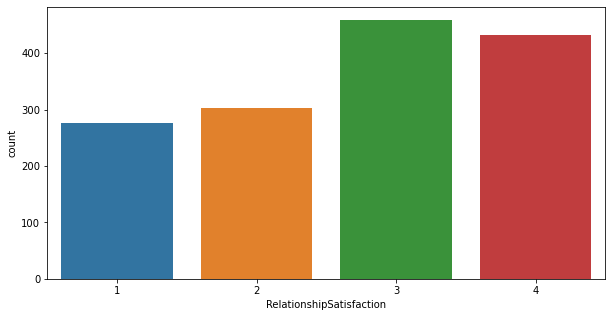

In [25]:
plt.figure(figsize = [10,5])
sns.countplot(x='RelationshipSatisfaction',data=data)
plt.show()

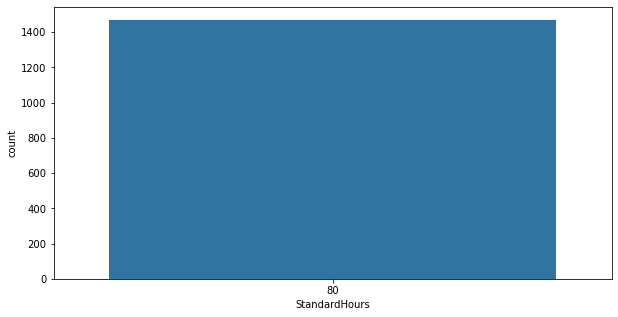

In [26]:
plt.figure(figsize = [10,5])
sns.countplot(x='StandardHours',data=data)
plt.show()

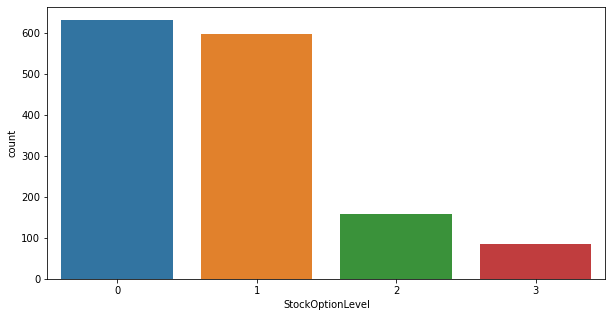

In [27]:
plt.figure(figsize = [10,5])
sns.countplot(x='StockOptionLevel',data=data)
plt.show()

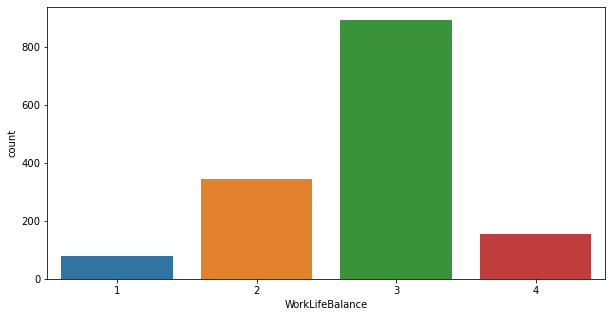

In [28]:
plt.figure(figsize = [10,5])
sns.countplot(x='WorkLifeBalance',data=data)
plt.show()

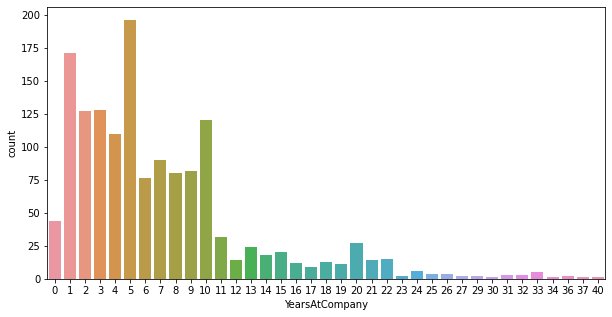

In [30]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsAtCompany',data=data)
plt.show()

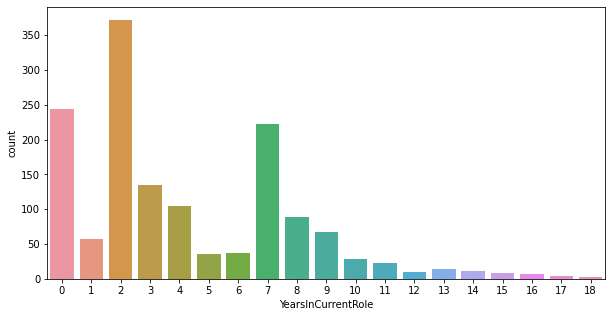

In [31]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsInCurrentRole',data=data)
plt.show()

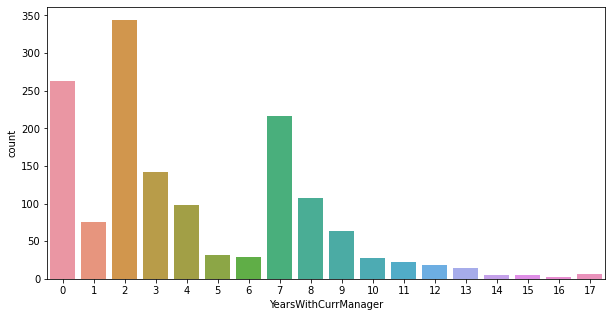

In [32]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsWithCurrManager',data=data)
plt.show()

<AxesSubplot:>

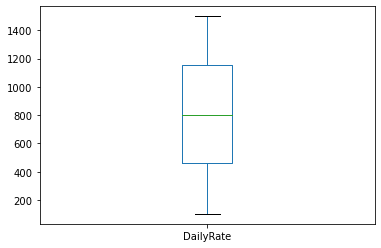

In [33]:
data['DailyRate'].plot.box()

<AxesSubplot:>

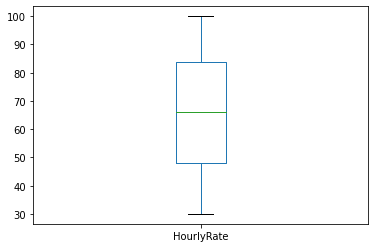

In [34]:
data['HourlyRate'].plot.box()

<AxesSubplot:>

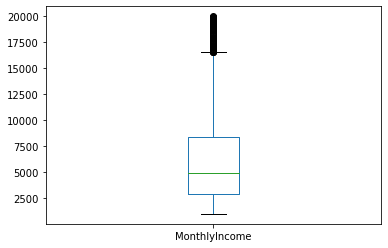

In [35]:
data['MonthlyIncome'].plot.box()

<AxesSubplot:>

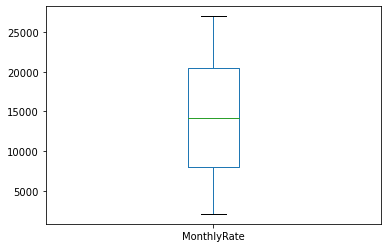

In [36]:
data['MonthlyRate'].plot.box()

## BIVARIATE ANALYSIS

Marital Status v/s Attrition

Text(0.5, 0, 'Marital Status')

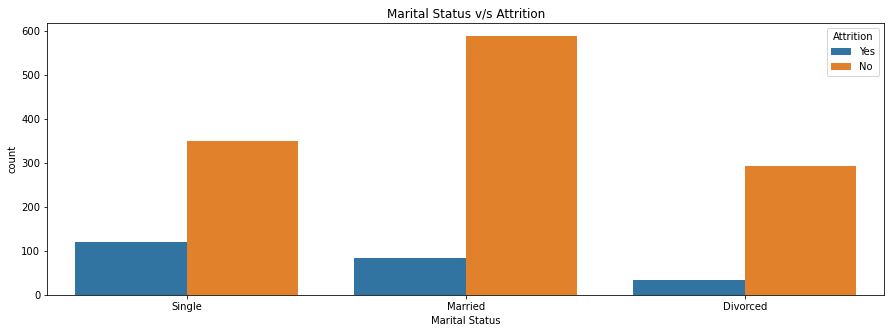

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=data)
plt.title('Marital Status v/s Attrition')
plt.xlabel('Marital Status')

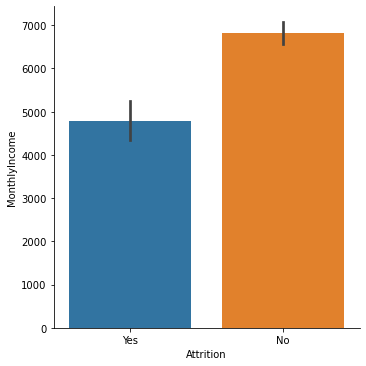

In [39]:
sns.factorplot(data=data,kind='bar',x='Attrition',y='MonthlyIncome')

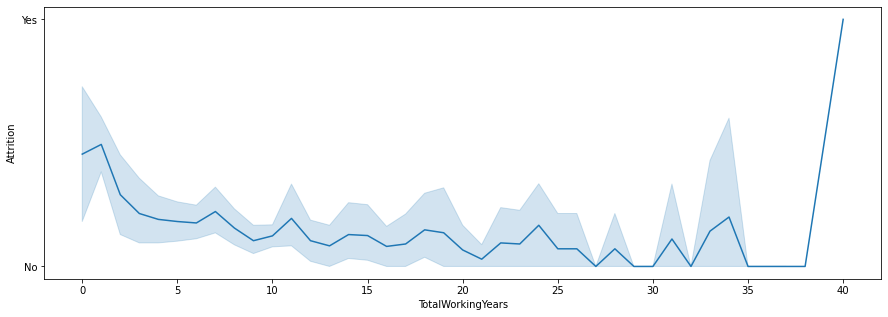

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(x='TotalWorkingYears',y='Attrition',data=data)
plt.show()

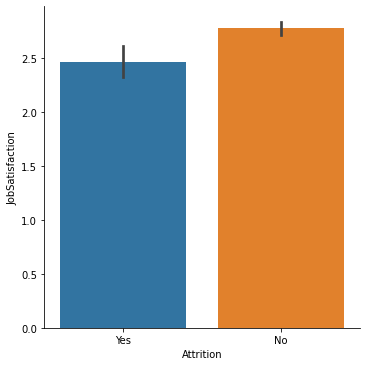

In [41]:
sns.factorplot(data=data,kind='bar',x='Attrition',y='JobSatisfaction')

<AxesSubplot:xlabel='Gender', ylabel='count'>

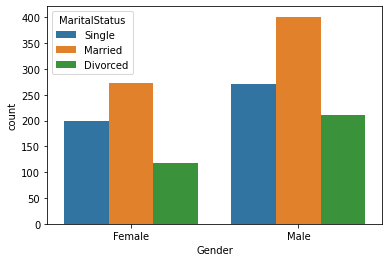

In [43]:
sns.countplot(data=data,x='Gender',hue='MaritalStatus')

### Multivariate Analysis

<AxesSubplot:>

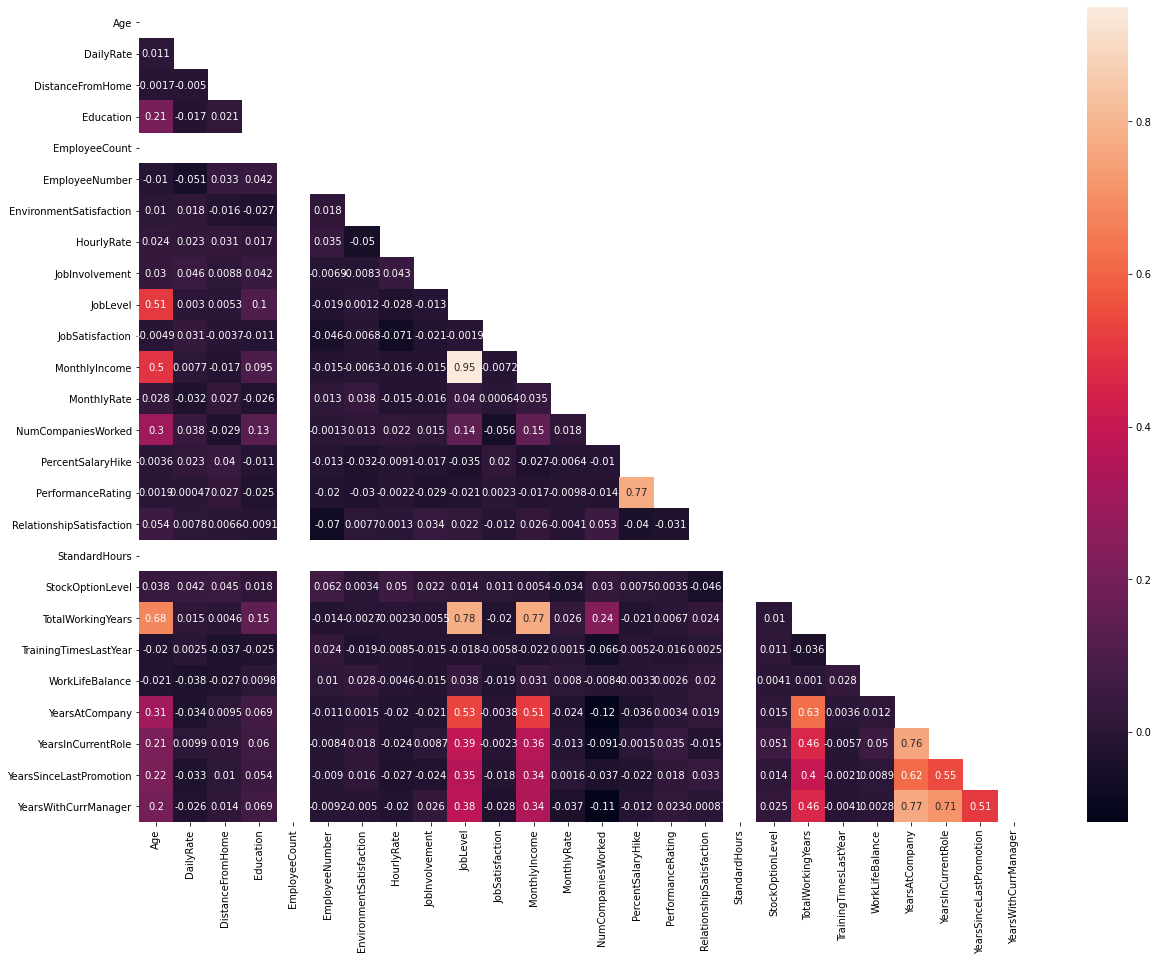

In [44]:
plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

## Removing Outliers and Skewness

In [45]:
data_outliers=data[['MonthlyIncome']]

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

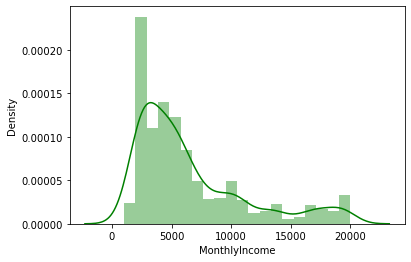

In [46]:
sns.distplot(data_outliers['MonthlyIncome'],color = 'Green')

### IQR Method

In [47]:
Q1 = data_outliers.quantile(0.25)
Q3 = data_outliers.quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data_outliers < (Q1-1.5*IQR)) | (data_outliers> (Q3 + 1.5*Q3))).any(axis = 1)]

In [48]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (1470, 35)
Shape After          : (1470, 35)
Percentage Loss      : 0.0


### ZSCORE Method

In [49]:
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(data_outliers))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [51]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (1470, 35)
Shape After          : (1470, 35)
Percentage Loss      : 0.0


### Skewness

In [53]:
df = data.copy()

In [54]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

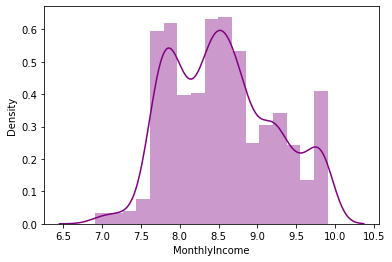

In [55]:
df['MonthlyIncome']=np.log1p(df['MonthlyIncome'])
sns.distplot(df['MonthlyIncome'],color = 'Purple')

In [56]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [57]:
data = df.copy()

In [58]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [59]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [60]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [61]:
data = data.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeNumber'])

<AxesSubplot:>

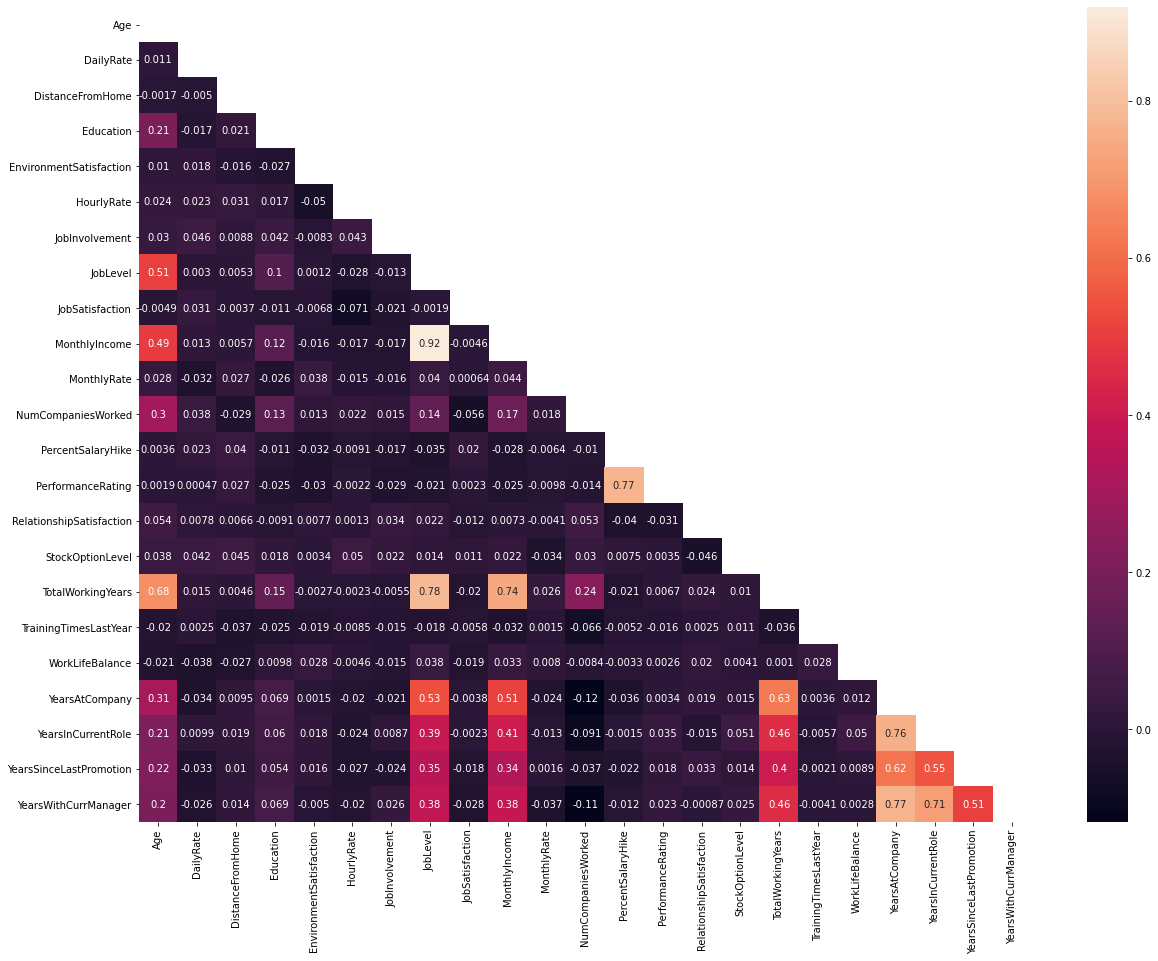

In [62]:
plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

### Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
     if data[i].dtypes=='object':
            data[i]= le.fit_transform(data[i].values.reshape(-1,1))
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [64]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [65]:
data.dtypes

Age                           int64
Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

In [66]:
X = data.drop(columns = 'Attrition')
Y = data['Attrition']

In [67]:
!pip install -U imbalanced-learn

In [68]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

## Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

In [70]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.8744939271255061  with Random State  98


### Splitting train and test data

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20, random_state=maxAcc) 

y_train.sample(5)

2122    1
1312    1
2023    1
1485    1
943     0
Name: Attrition, dtype: int32

## MODEL BUILDING:
### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train)
y_pred_log = Log_Reg.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)

Accuracy Score: 0.8744939271255061


In [74]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))

print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.65182186 0.85598377 0.84178499 0.87221095 0.87221095]
Avg_Cross_Validation Score:  0.8188025063438749


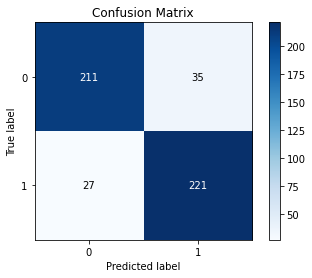

In [75]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()

In [76]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       246
           1       0.86      0.89      0.88       248

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494



### RandomForestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

Rand = RandomForestClassifier(random_state = 3)
Rand.fit(x_train,y_train)
y_pred_rand = Rand.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_rand))
A2 = accuracy_score(y_test,y_pred_rand)

Accuracy Score: 0.9129554655870445


In [79]:
print("Cross Validation Score: ", cross_val_score(Rand,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Rand,X_scaled,Y_over,cv=5).mean())
CV2 = cross_val_score(Rand,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.70242915 0.96146045 0.92292089 0.94726166 0.94117647]
Avg_Cross_Validation Score:  0.8950497244828407


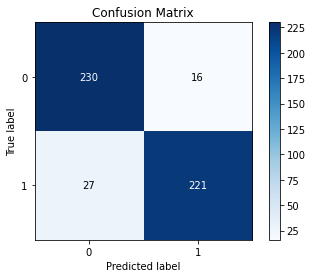

In [80]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rand)
plt.show()

In [81]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       246
           1       0.93      0.89      0.91       248

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



### DecisionTreeClassifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [83]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_dt))
A3 = accuracy_score(y_test,y_pred_dt)

Accuracy Score: 0.7793522267206477


In [84]:
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(dt,X_scaled,Y_over,cv=5).mean())
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.62550607 0.81744422 0.82555781 0.80527383 0.86409736]
Avg_Cross_Validation Score:  0.7883831125637466


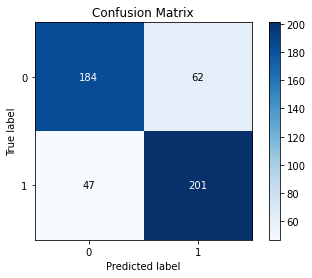

In [85]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
plt.show()

In [86]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       246
           1       0.76      0.81      0.79       248

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.78      0.78      0.78       494



### KNeighbors Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_knn))
A4 = accuracy_score(y_test,y_pred_knn)

Accuracy Score: 0.8603238866396761


In [89]:
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(knn,X_scaled,Y_over,cv=5).mean())
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.82793522 0.88843813 0.83975659 0.86206897 0.85192698]
Avg_Cross_Validation Score:  0.8540251784086521


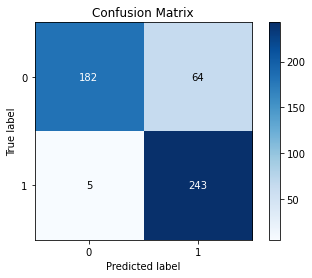

In [90]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()

In [91]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       246
           1       0.79      0.98      0.88       248

    accuracy                           0.86       494
   macro avg       0.88      0.86      0.86       494
weighted avg       0.88      0.86      0.86       494



### AdaBoostClassifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=100,random_state=40,algorithm='SAMME')
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)

In [93]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_adb))
A5 = accuracy_score(y_test,y_pred_adb)

Accuracy Score: 0.8724696356275303


In [94]:
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(adb,X_scaled,Y_over,cv=5).mean())
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.62753036 0.89249493 0.87221095 0.87221095 0.88640974]
Avg_Cross_Validation Score:  0.8301713872761166


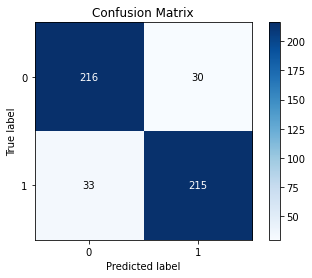

In [95]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_adb)
plt.show()

In [96]:
print(classification_report(y_test,y_pred_adb))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       246
           1       0.88      0.87      0.87       248

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494



### Support Vector classifcation

In [97]:
from sklearn.svm import SVC

sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)

In [98]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_sv))
A6 = accuracy_score(y_test,y_pred_sv)

Accuracy Score: 0.9109311740890689


In [99]:
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(sv,X_scaled,Y_over,cv=5).mean())
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.64574899 0.95334686 0.93306288 0.92292089 0.92494929]
Avg_Cross_Validation Score:  0.8760057813436697


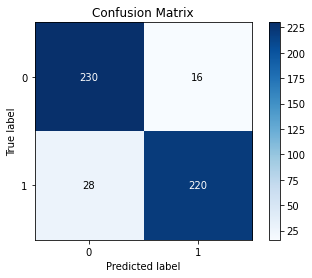

In [100]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()

In [101]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       246
           1       0.93      0.89      0.91       248

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



### CHECKING OVERALL SCORE OF MODELS

In [102]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree','KNeighbors Classifier','AdaBoostClassifier','SVC'],'Accuracy_Score':[A1,A2,A3,A4,A5,A6],'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6]})
Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [103]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.874494,0.818803,0.055691
1,Random Forest Classifier,0.912955,0.895050,0.017906
2,Decision Tree,0.779352,0.790412,-0.011059
3,KNeighbors Classifier,0.860324,0.854025,0.006299
4,AdaBoostClassifier,0.872470,0.830171,0.042298
5,SVC,0.910931,0.876006,0.034925


In [104]:
Overall_Score['Difference'].min()

-0.011059283409021847

In [105]:
Overall_Score[Overall_Score['Difference']==-0.011059283409021847]


,Model,Accuracy_Score,Cross_Validation_Score,Difference
2,Decision Tree,0.779352,0.790412,-0.011059


## HyperParameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid={'algorithm': ['kd_tree', 'brute'],'leaf_size': [15, 18, 20,25,30],'n_neighbors': [3, 5, 7, 13],
            'weights':['uniform', 'distance'],'metric':['euclidean','manhattan','minkowski','chebyshev']}

gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20, 25, 30],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [3, 5, 7, 13],
                         'weights': ['uniform', 'distance']})

In [107]:
print(gridsearch.best_score_, gridsearch.best_params_)

0.8869048383987662 {'algorithm': 'kd_tree', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [108]:
KNN = KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=7 ,weights = 'distance',metric = 'manhattan')
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

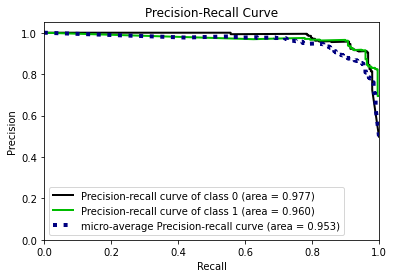

In [109]:
import matplotlib.pyplot as plt
import scikitplot as skplt
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

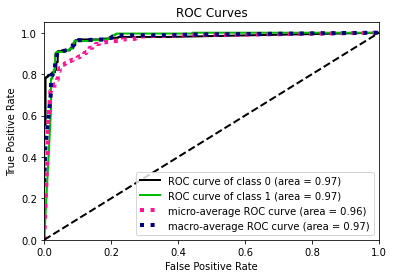

In [110]:
import matplotlib.pyplot as plt
import scikitplot as skplt
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, probas)

plt.show()

## Saving the model

In [111]:
import joblib
joblib.dump(KNN,'HR_Attrition_Prediction.obj')

['HR_Attrition_Prediction.obj']

## PERFORMANCE METRICS

In [112]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score: ", cross_val_score(KNN,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(KNN,X_scaled,Y_over,cv=5).mean())

Accuracy Score: 0.8906882591093117
Cross Validation Score:  [0.8582996  0.90872211 0.87829615 0.88032454 0.89655172]
Avg_Cross_Validation Score:  0.8844388236936546


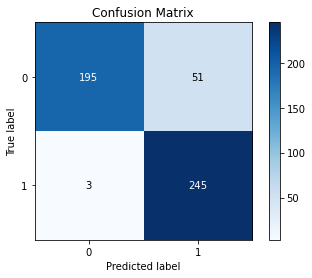

In [113]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       246
           1       0.83      0.99      0.90       248

    accuracy                           0.89       494
   macro avg       0.91      0.89      0.89       494
weighted avg       0.91      0.89      0.89       494

